In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Marcelo Sampaio/Desktop/Datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
del df['User ID']
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
idCat, cat = pd.factorize(df['Gender']) #Male = 0 and female = 1
idCat

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [5]:
df['GenderCat'] = idCat
df.head()

,Gender,Age,EstimatedSalary,Purchased,GenderCat
0,Male,19,19000,0,0
1,Male,35,20000,0,0
2,Female,26,43000,0,1
3,Female,27,57000,0,1
4,Male,19,76000,0,0


In [6]:
del df['Gender']
df.head()

,Age,EstimatedSalary,Purchased,GenderCat
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
 3   GenderCat        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [8]:
df.describe()

,Age,EstimatedSalary,Purchased,GenderCat
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.510000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,1.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


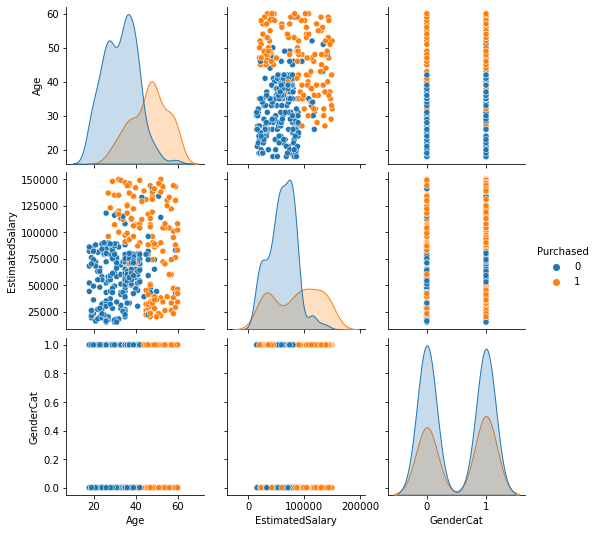

In [10]:
sns.pairplot(df,hue='Purchased')

<AxesSubplot:>

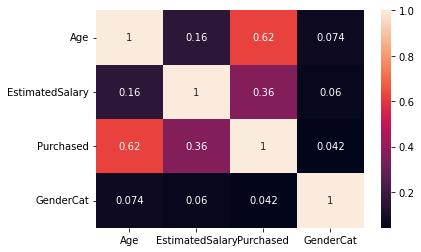

In [11]:
sns.heatmap(df.corr(),annot=True)

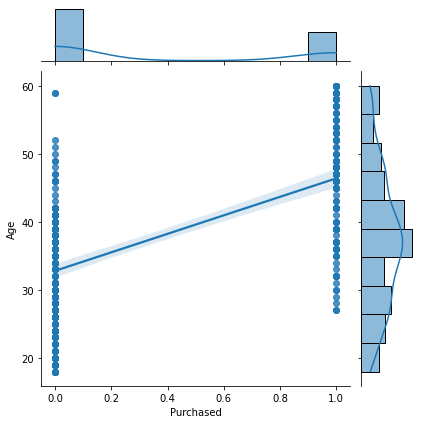

In [12]:
sns.jointplot(x='Purchased', y='Age',data=df,kind='reg')

In [13]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

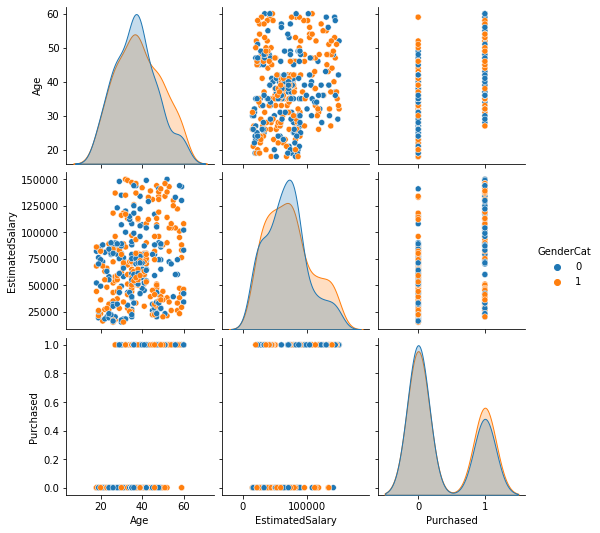

In [14]:
sns.pairplot(df,hue='GenderCat')

In [16]:
X = df.drop('Purchased',axis=1)
X

,Age,EstimatedSalary,GenderCat
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,0
397,50,20000,1
398,36,33000,0


In [17]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [20]:
X_train.shape

(320, 3)

In [21]:
X_test.shape

(80, 3)

In [22]:
params = [
    {
        'max_depth':[4,8,12],
        'max_features':[1,2,3],
        'min_samples_leaf':[4,8,12],
        'min_samples_split':[4,8,12]
    }
]
ins = RandomForestClassifier()
grid_search = GridSearchCV(ins,params,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [24]:
ins = RandomForestClassifier(max_depth=8,max_features=2,min_samples_leaf=4,min_samples_split=8)

In [25]:
ins.fit(X_train,y_train)
pred = ins.predict(X_test)
pred[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
y_test[:10]

248    0
318    1
173    0
285    1
184    0
235    1
124    0
282    1
151    0
169    0
Name: Purchased, dtype: int64

In [27]:
ins.score(X_test,y_test)

0.8875

In [28]:
cross = cross_val_score(ins,X_test,y_test,cv=10,scoring='accuracy')
final = sum(cross)/len(cross)
final

0.9125

In [29]:
print(confusion_matrix(y_test,pred))

[[46  3]
 [ 6 25]]
